In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('online.csv')

In [3]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Clod,Indoor,No
1,2,Cloudy,Clod,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Clod,Outdoor,Yes
4,5,Cloudy,Clod,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [4]:
df = df.drop('Days',axis=1)

In [5]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Clod,Indoor,No
1,Cloudy,Clod,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Clod,Outdoor,Yes
4,Cloudy,Clod,Outdoor,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [8]:
y = df['Wear Jacket?']

In [9]:
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [10]:
x = df.drop('Wear Jacket?',axis=1)

In [11]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Clod,Indoor
1,Cloudy,Clod,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Clod,Outdoor
4,Cloudy,Clod,Outdoor


# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier()

In [15]:
# clf.fit(x,y)

# Preprocessing

In [16]:
#Encoding
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
x.Outlook = le.fit_transform(df['Outlook'])

In [19]:
x.head()

,Outlook,Temprature,Routine
0,1,Clod,Indoor
1,0,Clod,Indoor
2,0,Warm,Outdoor
3,1,Clod,Outdoor
4,0,Clod,Outdoor


In [20]:
x.Temprature = le.fit_transform(df['Temprature'])
x.Routine = le.fit_transform(df['Routine'])

In [21]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [22]:
clf.fit(x,y)

DecisionTreeClassifier()

In [23]:
clf.predict([[1,0,0]])#1 = sunny; 0 = cold;= 0 indoor

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [24]:
clf.predict([[1,0,1]])#1 = sunny; 0 = cold;= 0 indoor

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

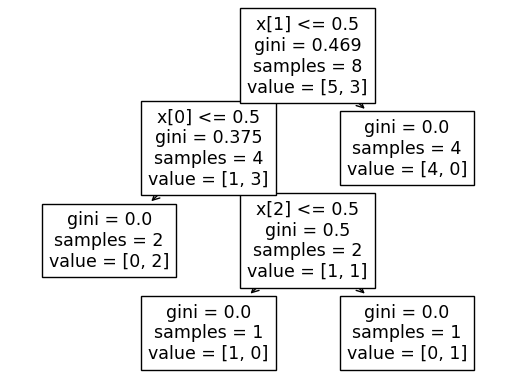

In [26]:
from sklearn import tree
tree.plot_tree(clf)

In [32]:
plt.savefig('tree.png')

<Figure size 640x480 with 0 Axes>

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

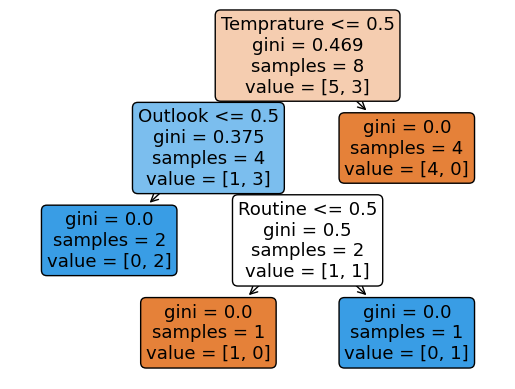

In [29]:
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)

In [30]:
# x.columns

<Figure size 640x480 with 0 Axes>